# I have run an external script 'assignment3_mcmc_chains.py' which actually performs the MCMC chains themselves and stores the results to file. This notebook reads in the chain results, plots them and provides follow-up discussion about the results. (Both of these files are found in my assignment 3 folder in the GitHub repository).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from getdist import plots, MCSamples, parampriors

In [2]:
para_names = np.array(['omega_m', 'omega_b', 'As', 'w'])
param_names_latex = [r'$\Omega_\mathrm{m}$', r'$\Omega_\mathrm{b}$', 
                     r'$A_\mathrm{s}$',r'$w$']
parameters = np.load('data_4_assignment2/parameters.npz')
parameters.keys()
para_priors = {}
para_priors_low = {}
para_priors_up = {}
for name in para_names:
    para_priors[name] = [np.min(parameters[name]),np.max(parameters[name])]
    para_priors_low[name] = np.min(parameters[name])
    para_priors_up[name] = np.max(parameters[name])
    
colors = ['lightcoral', 'royalblue', 'orange']
bright = ['#4477AA', '#EE6677', '#228833', '#CCBB44', 
          '#66CCEE', '#AA3377', '#BBBBBB']
retro = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g = plots.get_subplot_plotter(width_inch=12)
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = '-'
g.settings.title_limit_labels = False
g.settings.axis_marker_color = 'k'
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth = 2.0
g.settings.linewidth_contour = 3.0
g.settings.legend_fontsize = 22
g.settings.axes_fontsize = 17
g.settings.axes_labelsize = 22
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = retro
priors = parampriors.ParamBounds()

## TASK 1

For the first task, we run an MCMC chain for the noisy reference vector varying all four parameters and we use the true (analytic) covariance matrix. We also use the following hyperparameters: seed=0, total_steps=2000, burning_steps=100, nwalkers=100. In order to avoid spurious local minima, I have also narrowed the range for the starting positions to more closely emcompass the posteriors. Shown below are plots of the resulting contour plots for the posterior distributions and the distribution of chi-squared values. As expected, we observe the chi-squared values near 900.

Removed no burn in


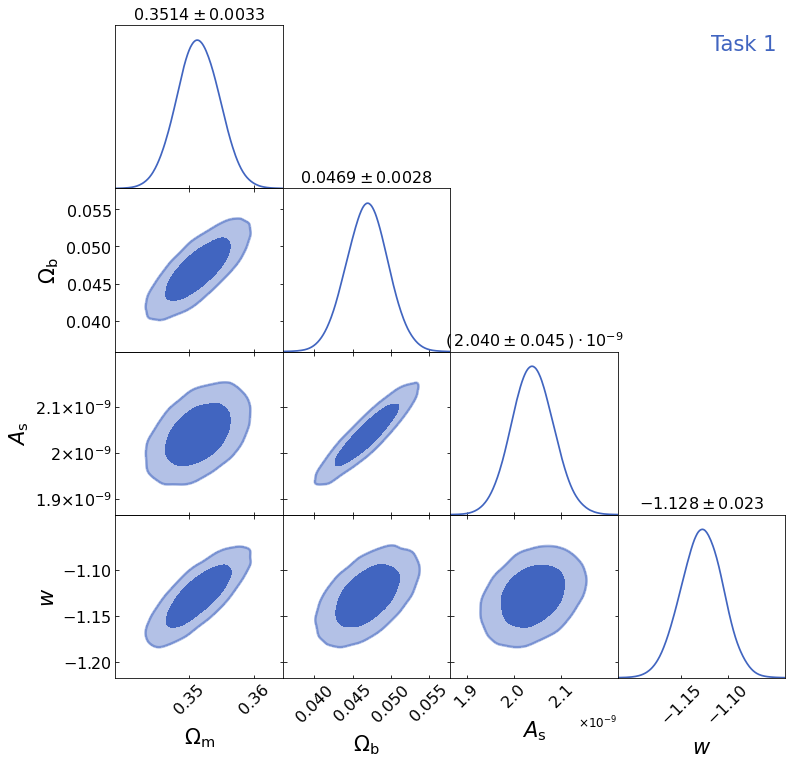

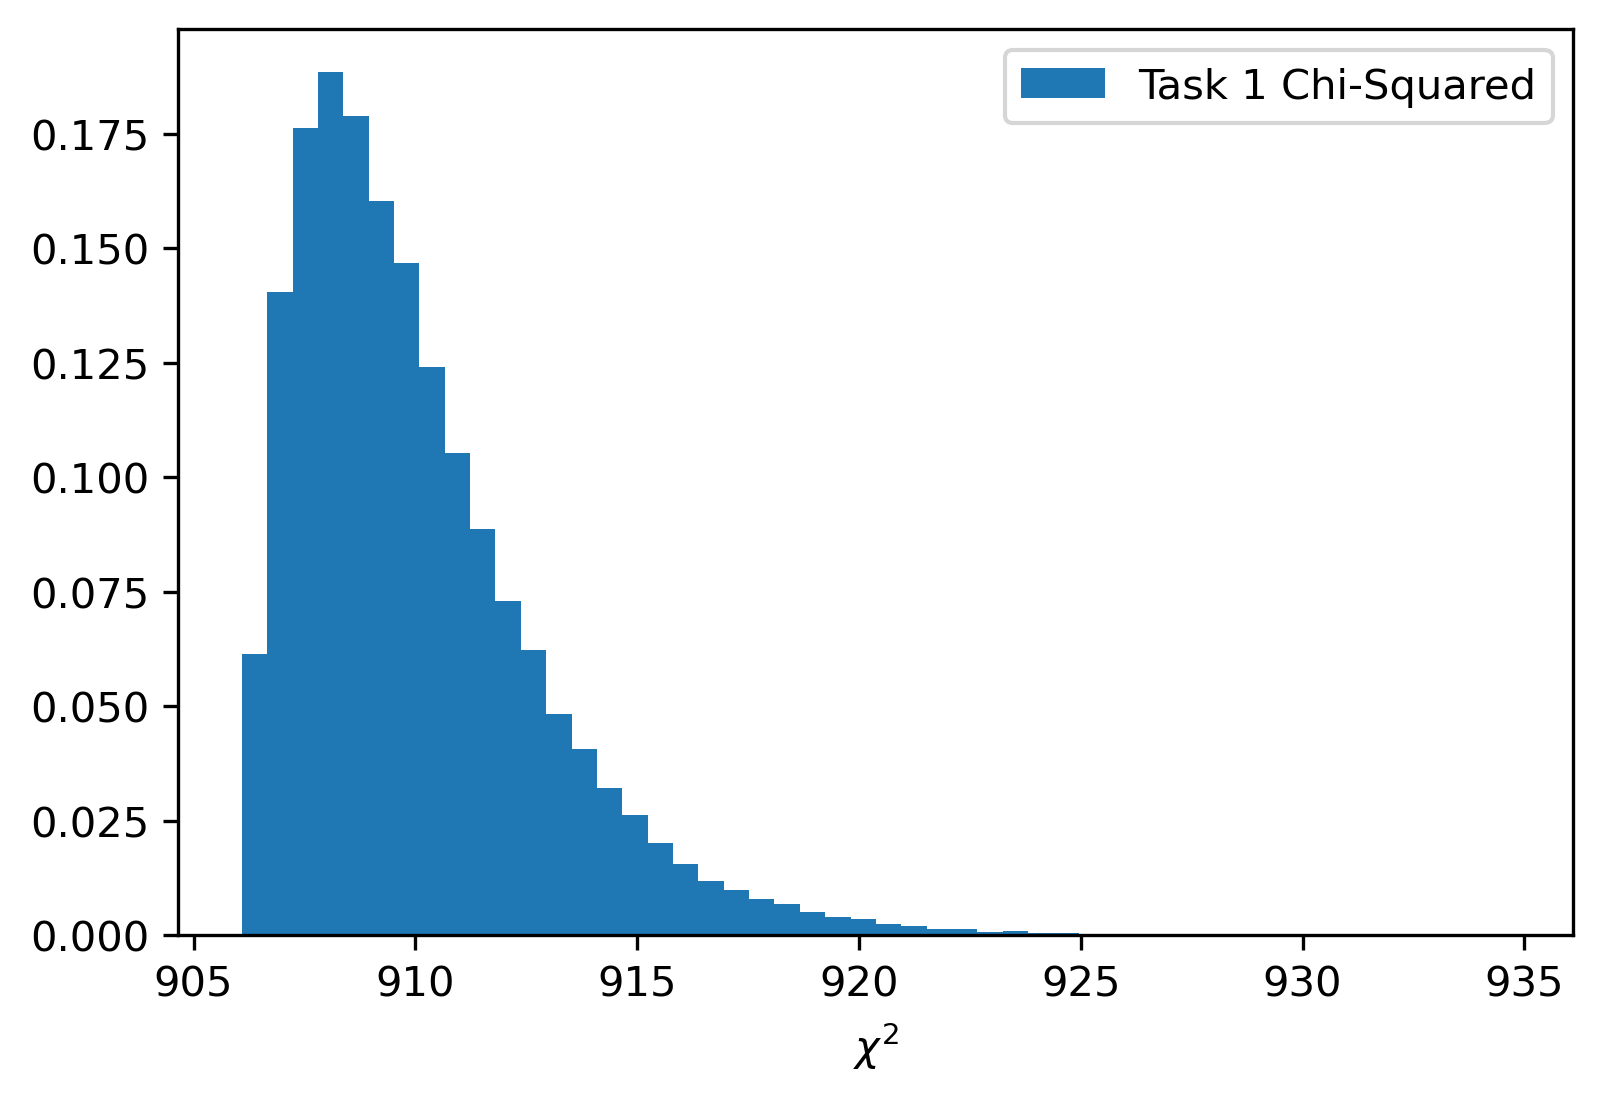

In [3]:
# Reads in the pre-generated data
samples1 = np.load('outputs_MCMC/MCMC_task1.npy')
logp1 = np.load('outputs_MCMC/logp_task1.npy')
samples_getdist1 = MCSamples(samples=samples1,names = param_names_latex, 
                            ranges = para_priors, 
                            settings={'smooth_scale_2D': 0.3, 
                                      'smooth_scale_1D': 0.3})

# Makes a triangle plot of the posteriors for the four parameters
g.triangle_plot(
    roots=[samples_getdist1],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Task 1'],
    title_limit=1,
    markers=para_names)

# Makes a plot of the chi-squared distribution
fig,ax=plt.subplots(dpi=300)
ax.hist(-2*logp1,bins=50, label='Task 1 Chi-Squared', density=True)
ax.set_xlabel(r'$\chi^2$')
ax.legend()

## TASK 2

For the second task, we repeat the steps from task 1 (using the same noisy reference vector, hyperparameters and starting positions) but instead we use the numerical covariance matrices which use 1500, 3000 or 10000 vectors to estimate respectively. We also compare between when the Hartlap correction is and is not applied, i.e. multiplying the inverse covariance matrix by: $$h = (n_r-n_s-2)/(n_r-1)$$ where $n_r=1500,3000,10000$ is the number of realizations used to estimate the covariance and $n_s=900$ is the length of the data vector. Again we show the resulting contour plots and chi-squared distributions below. 

While the mean parameter estimates do not change noticeably whether we apply Hartlap correction or not, we find that the resulting uncertainties do change. This is because the Hartlap factor corrects for the overly optimistic constraints that result from changing the degrees of freedom. By rescaling the inverse covariance matrix, we only expect the uncertainties to change but not the expected value for the parameters. As can be seen in the two contour plots, the change in uncertainty is most pronounced for the 1500 covariance matrix case, which makes sense because it uses the fewest realizations and thus will have the largest Hartlap correction, whereas for the 10000 covariance case the number of realizations is much larger than the size of the data vector so the constraints change less significantly. While the parameter estimates between the cases of 1500, 3000, 10000 realizations are relatively consistent (not statistically significant) with each other, the posteriors between them are slightly shifted apart. This is expected given that a noisy covariance matrix will naturally lead to differences in the posterior distribution for a particular estimate of the covariance matrx. Supporting this is the fact that as the number of realizations grows, the resulting posterior distributions approach the analytic covariance matrix distributions. Furthermore, the chi-squared distributions deviate significantly from 900 when we do not apply the Hartlap correction (similar to the contour plots the deviations from 900 increase the fewer the number of realizations used, as we can see based on 1500 having the highest chi-squared followed by 3000 and then 10000). We notice though that after applying the Hartlap correction, the chi-squared values become much closer to their expected values of 900. Again, we attribute this to correcting for the biased inverse covariance matrix which will artificially scale the chi-squared values. These results mirror closely the results we found from assignment 1, where the absence of the Hartlap correction lead to deviations in the chi-squared distributions, with the cases with the fewest realizations leading to the largest deviations and the cases with the most realizations leading to the smallest deviations, whereas the application of the Hartlap factor in that case largely debiased the estimates, like we are finding here. To quantify this more closely, the computed values for the Hartlap correction are: $$h(1500) = (1500-900-2)/(1500-1) \sim 0.4$$ $$h(3000) = (3000-900-2)/(3000-1) \sim 0.7$$ $$h(10000) = (10000-900-2)/(10000-1) \sim 0.9$$ Therefore, in the absence of a Hartlap correction, we would expect to observe chi-squared values near 2250 for 1500 realizations, 1285 for 3000 realizations and 1000 for 10000 realizations, which agree closely with the chi-squared distributions shown in the histogram below!

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


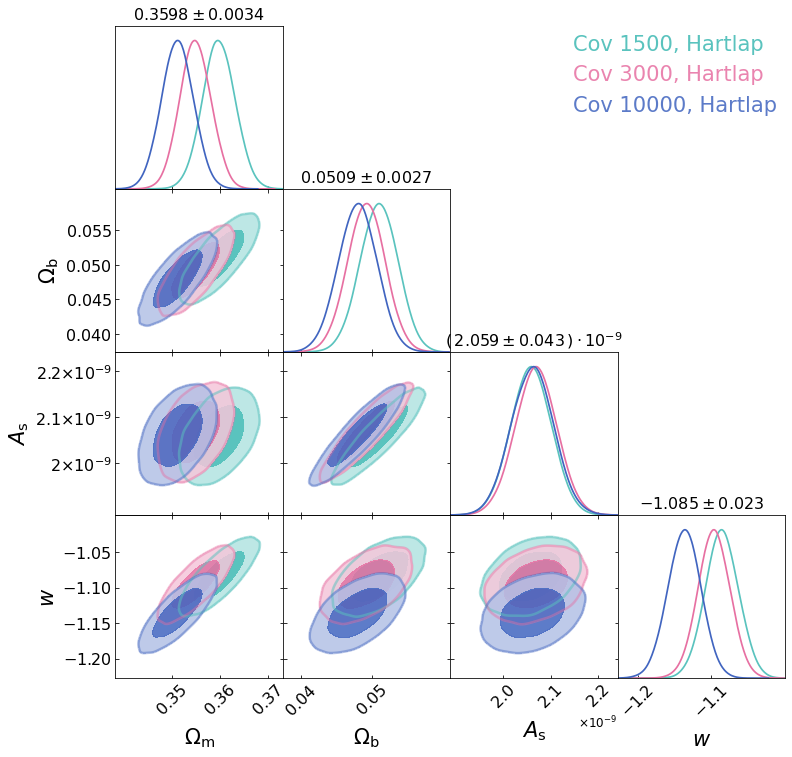

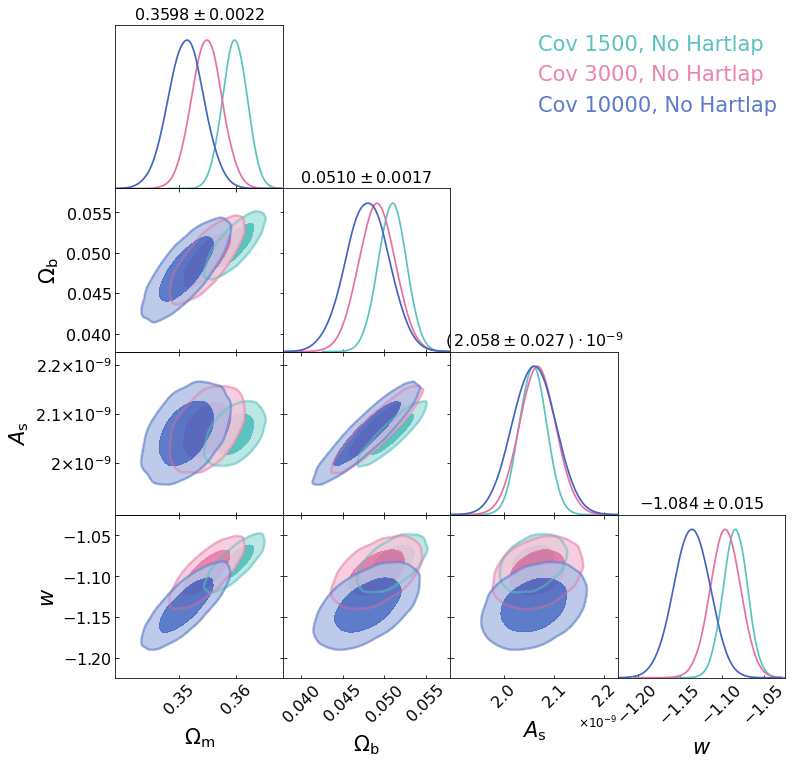

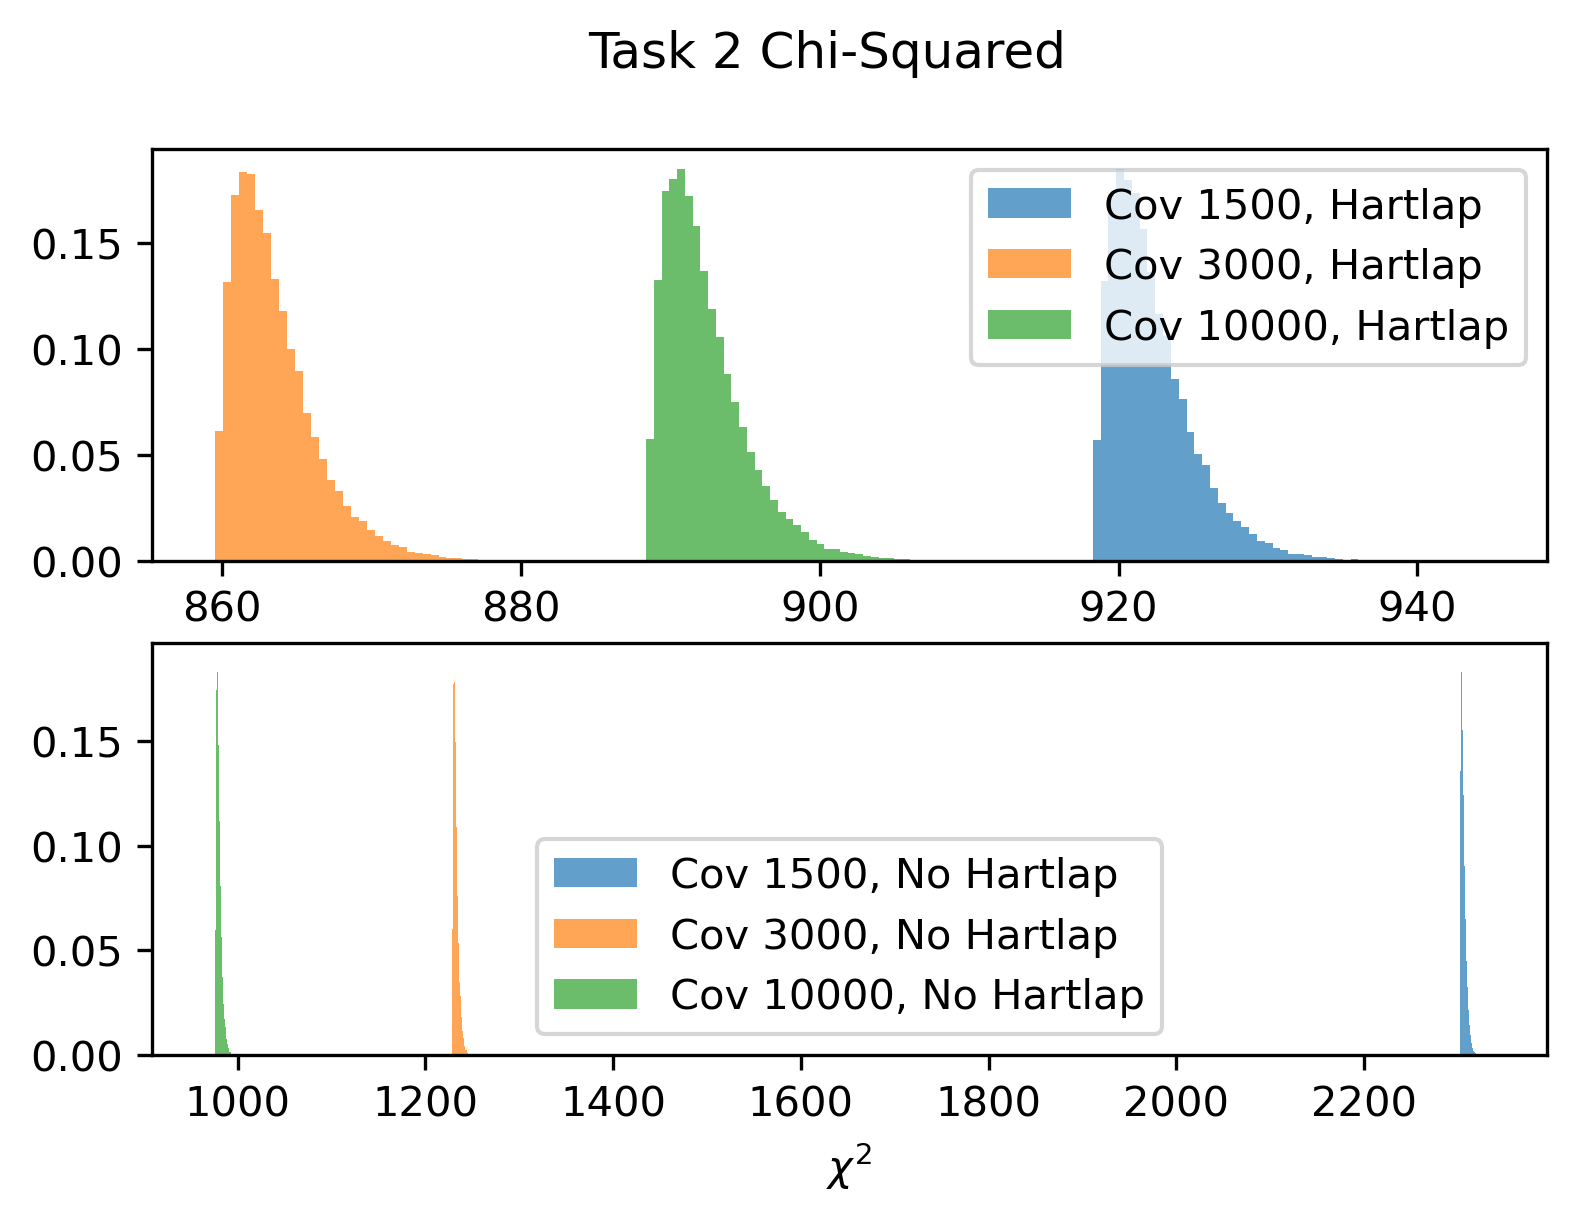

In [4]:
# Reads in the pre-generated data
samples2_1500_hartlap = np.load('outputs_MCMC/MCMC_task2_1500_True.npy')
samples2_1500_nohartlap = np.load('outputs_MCMC/MCMC_task2_1500_False.npy')
samples2_3000_hartlap = np.load('outputs_MCMC/MCMC_task2_3000_True.npy')
samples2_3000_nohartlap = np.load('outputs_MCMC/MCMC_task2_3000_False.npy')
samples2_10000_hartlap = np.load('outputs_MCMC/MCMC_task2_10000_True.npy')
samples2_10000_nohartlap = np.load('outputs_MCMC/MCMC_task2_10000_False.npy')
logp2_1500_hartlap = np.load('outputs_MCMC/logp_task2_1500_True.npy')
logp2_1500_nohartlap = np.load('outputs_MCMC/logp_task2_1500_False.npy')
logp2_3000_hartlap = np.load('outputs_MCMC/logp_task2_3000_True.npy')
logp2_3000_nohartlap = np.load('outputs_MCMC/logp_task2_3000_False.npy')
logp2_10000_hartlap = np.load('outputs_MCMC/logp_task2_10000_True.npy')
logp2_10000_nohartlap = np.load('outputs_MCMC/logp_task2_10000_False.npy')
samples_getdist2_1500_hartlap = MCSamples(samples=samples2_1500_hartlap,
                                            names = param_names_latex, 
                                            ranges = para_priors, 
                                            settings={'smooth_scale_2D': 0.3, 
                                                      'smooth_scale_1D': 0.3})
samples_getdist2_1500_nohartlap = MCSamples(samples=samples2_1500_nohartlap,
                                            names = param_names_latex, 
                                            ranges = para_priors, 
                                            settings={'smooth_scale_2D': 0.3, 
                                                      'smooth_scale_1D': 0.3})
samples_getdist2_3000_hartlap = MCSamples(samples=samples2_3000_hartlap,
                                            names = param_names_latex, 
                                            ranges = para_priors, 
                                            settings={'smooth_scale_2D': 0.3, 
                                                      'smooth_scale_1D': 0.3})
samples_getdist2_3000_nohartlap = MCSamples(samples=samples2_3000_nohartlap,
                                            names = param_names_latex, 
                                            ranges = para_priors, 
                                            settings={'smooth_scale_2D': 0.3, 
                                                      'smooth_scale_1D': 0.3})
samples_getdist2_10000_hartlap = MCSamples(samples=samples2_10000_hartlap,
                                            names = param_names_latex, 
                                            ranges = para_priors, 
                                            settings={'smooth_scale_2D': 0.3, 
                                                      'smooth_scale_1D': 0.3})
samples_getdist2_10000_nohartlap = MCSamples(samples=samples2_10000_nohartlap,
                                            names = param_names_latex, 
                                            ranges = para_priors, 
                                            settings={'smooth_scale_2D': 0.3, 
                                                      'smooth_scale_1D': 0.3})


# Makes a triangle plot of the posteriors for the four parameters
g.triangle_plot(
    roots=[samples_getdist2_1500_hartlap,
           samples_getdist2_3000_hartlap,
           samples_getdist2_10000_hartlap],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Cov 1500, Hartlap',
                     'Cov 3000, Hartlap',
                     'Cov 10000, Hartlap'],
    title_limit=1,
    markers=para_names)

g.triangle_plot(
    roots=[samples_getdist2_1500_nohartlap,
           samples_getdist2_3000_nohartlap,
           samples_getdist2_10000_nohartlap],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Cov 1500, No Hartlap',
                     'Cov 3000, No Hartlap',
                     'Cov 10000, No Hartlap'],
    title_limit=1,
    markers=para_names)

# Makes a plot of the chi-suared distributions
fig,ax=plt.subplots(2,1, sharex=False, sharey=False, dpi=300)
fig.suptitle('Task 2 Chi-Squared')
ax[0].hist(-2*logp2_1500_hartlap, label='Cov 1500, Hartlap', bins=50, alpha=0.7, density=True)
ax[0].hist(-2*logp2_3000_hartlap, label='Cov 3000, Hartlap', bins=50, alpha=0.7, density=True)
ax[0].hist(-2*logp2_10000_hartlap, label='Cov 10000, Hartlap', bins=50, alpha=0.7, density=True)
ax[1].hist(-2*logp2_1500_nohartlap, label='Cov 1500, No Hartlap', bins=50, alpha=0.7, density=True)
ax[1].hist(-2*logp2_3000_nohartlap, label='Cov 3000, No Hartlap', bins=50, alpha=0.7, density=True)
ax[1].hist(-2*logp2_10000_nohartlap, label='Cov 10000, No Hartlap', bins=50, alpha=0.7, density=True)
ax[1].set_xlabel(r'$\chi^2$')
ax[0].legend()
ax[1].legend()

## TASK 3

For the third task we repeat the same steps to tasks 1 and 2 (using the same noisy reference vector, hyperparameters and starting positions), except now we apply PCA data compression and test out the constraints when using different number of elements. To do this, we apply scikit-learn decomposition's PCA function to fit the appropriate transformation on the list of model vectors and their mean. We then compute the rotation matrix which is used to transform the covariance matrix into this new optimized basis; finally we transform the noisy reference vector to this new basis as well. At this point we simply replace the quantities in our defined functions with their equivalents in the new PCA basis. To obtain our covariance matrices, we simply slice the full covariance matrix based on the desired number of PCA elements for both the analytic covariance matrix and the covariance matrix using 1500 realizations. And for the case of the 1500 covariance matrix, we also apply a Hartlap correction but this time based on the number of PCA elements used (to debias the inverse covariance as we did in task 2), i.e. we have: $$h = (1500 - N_{PCA}-2)/(1500-1)$$ To avoid additional computation time, we generate ahead of time a dictionary which will store the inverse covariance matrices for the different number of PCA elements to avoid having to invert them every time the functions are called. For our purposes, we have generated results for several number of elements: $N_{PCA}=100, 300, 500, 700, 900$ (given that there are 900 elements in the original data vector, we expect to obtain the exact same constraints when using 900 PCA elements as with our initial analysis which we indeed find is the case)! Shown below are the resulting contour plots and the chi-squared distributions.

We begin by noting that in both the cases of the analytic and 1500 covariance matrices, the constraints get tighter the more PCA elements are added. This intuitively makes sense because some information is lost if not all elements are included. However because the PCA basis is optimized and the elements are sorted by order of importance in the information they contain, fewer elements are needed to capture most of the information than would be required if we randomly selected particular elements of the original basis to omit. The constraints for the PCA=100 case are noticeably bigger, but for PCA elements higher than this, the relative improvement gained by further increasing the number of elements is relatively small. This key result is consistent with assignment 2, where we found that relatively few number of PCA elements were required to obtain within 5-10% constraining power of the full data vector above which adding more elements has smaller and smaller impact. While we observe the same overall trend of tighter constraints the more PCA elements are added for both the analytic and 1500 realizations case, a key difference is that the posterior distributions for the analytic case agree more closely whereas for the 1500 realizations case, they are shifted slightly. Like we discussed in task 2, the 1500 realizations covariance matrix is intrinsically noisy meaning that any particular realization of it will lead to posteriors that fluctuate from the true parameter values. We keep in mind though that applying the Hartlap correction for the different number of PCA elements prevents us from getting overly optimistic constraints for the different number of PCA elements despite the mean parameter values disagreeing slightly (otherwise, we would have observed successively tighter constraints as more PCA elements are added since the number of realizations is held fixed but number of elements in the data element increases, leading to a larger Hartlap correction)! We also notice that the chi-squared distributions are as they should be – centred near 100, 300, 500, 700, 900 respectively. This makes sense because for this task, the PCA data compression results in changing the number of elements in the data vector and thus having different degrees of freedom. We notice however that the chi-squared distributions don't differ that much between the analytic and 1500 case. As discussed above this can be attributed to the fact that we have applied the Hartlap correction for the different number of elements. In the absence of this, we would expect to see chi-squared values of around 107 for 100 realizations, 375 for 300 realizations, 750 for 500 realizations, 1315 for 700 realizations and 2260 for 900 realizations.

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


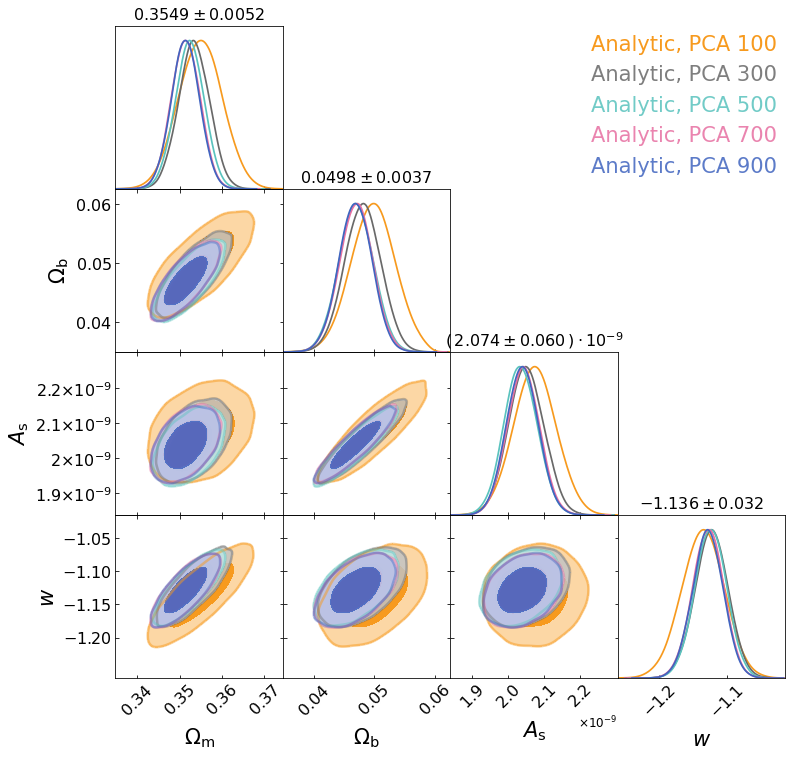

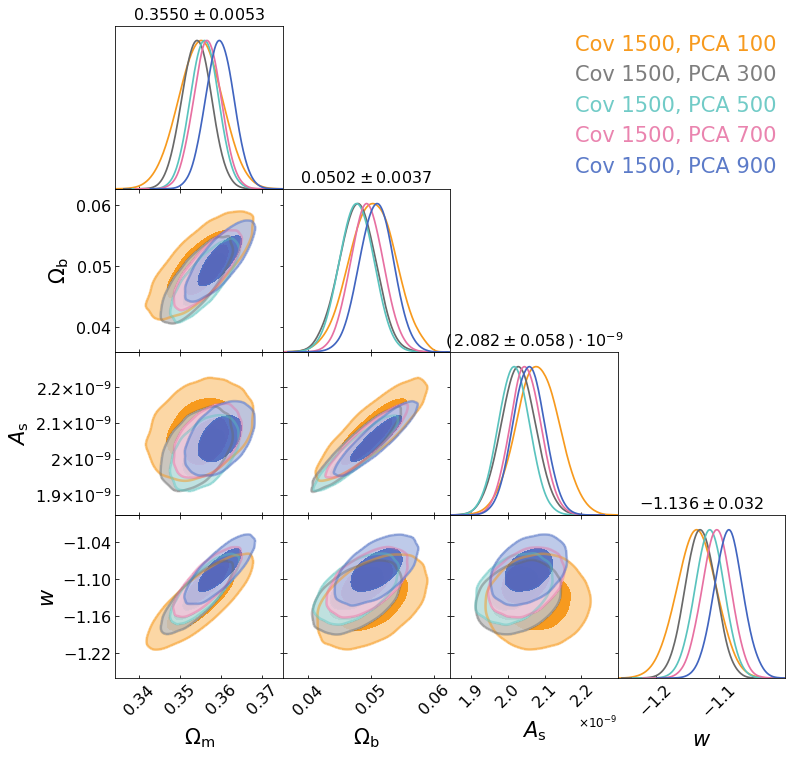

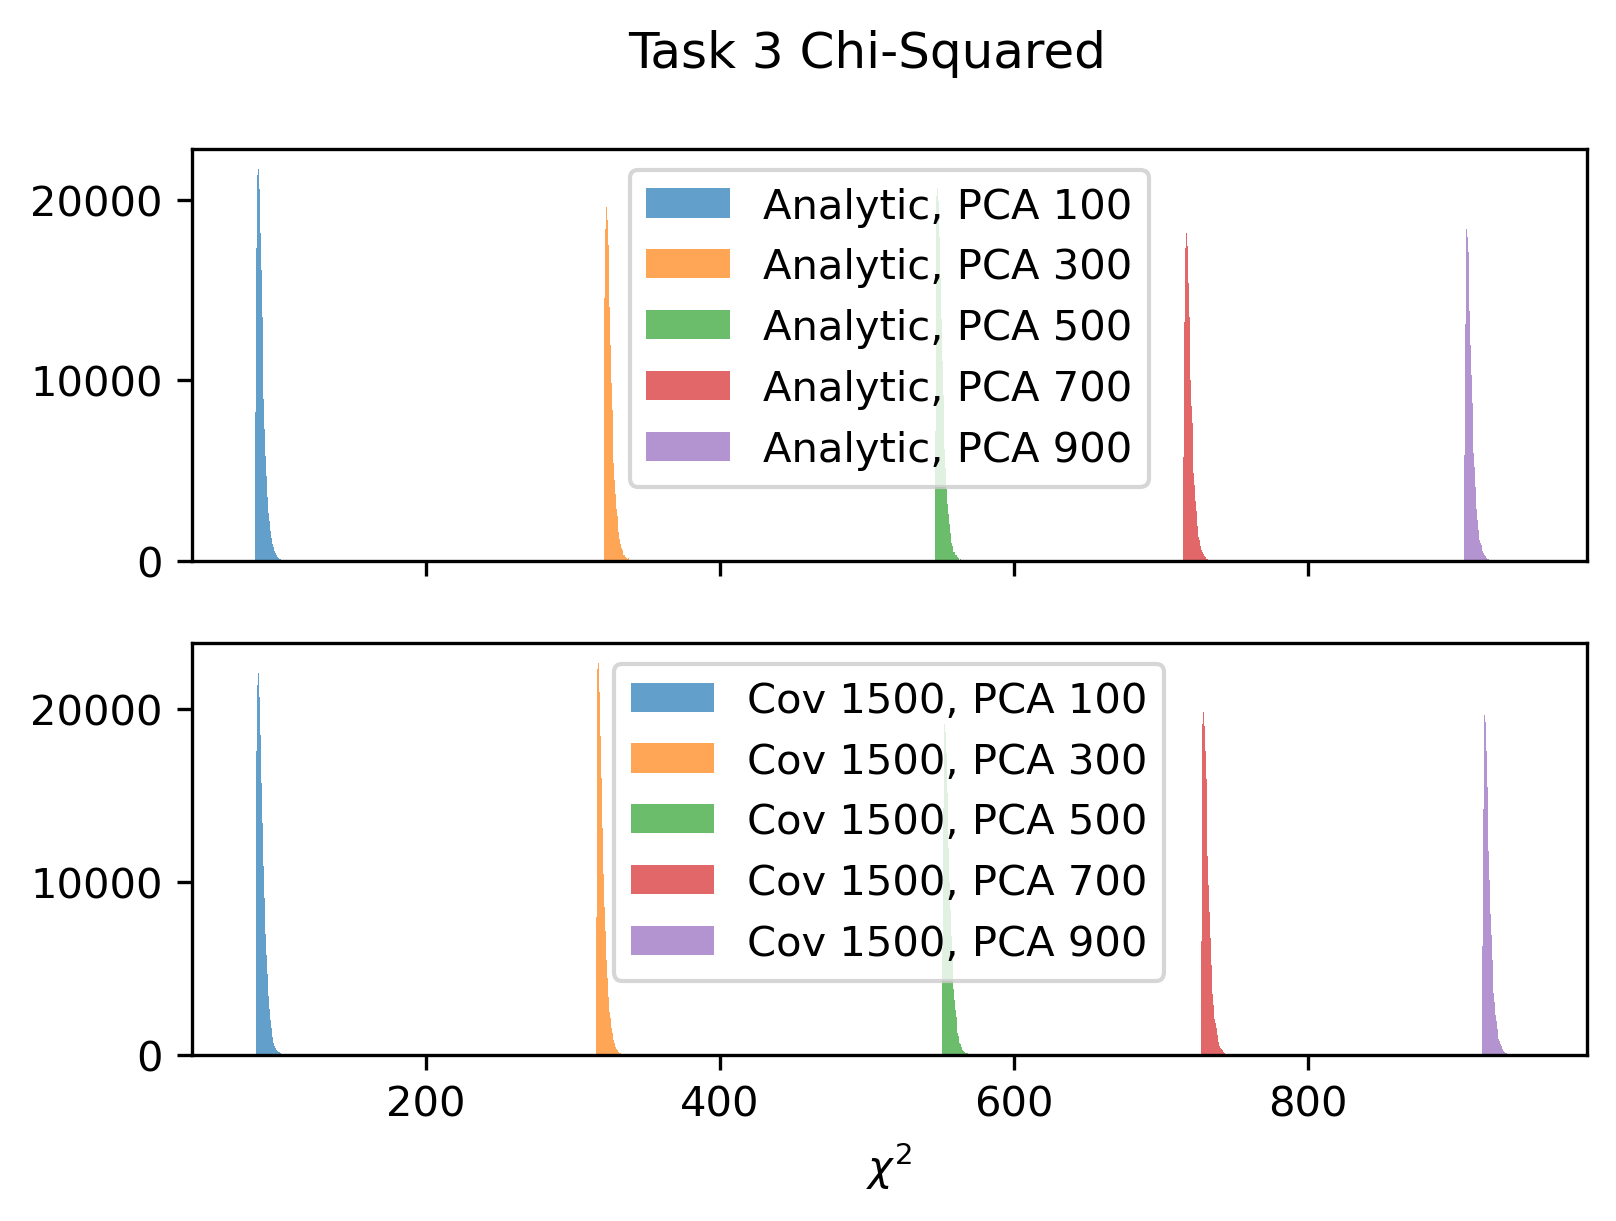

In [5]:
# Reads in the pre-generated data
samples3_analytic_100 = np.load('outputs_MCMC/MCMC_task3_analytical_100.npy')
samples3_analytic_300 = np.load('outputs_MCMC/MCMC_task3_analytical_300.npy')
samples3_analytic_500 = np.load('outputs_MCMC/MCMC_task3_analytical_500.npy')
samples3_analytic_700 = np.load('outputs_MCMC/MCMC_task3_analytical_700.npy')
samples3_analytic_900 = np.load('outputs_MCMC/MCMC_task3_analytical_900.npy')
samples3_1500_100 = np.load('outputs_MCMC/MCMC_task3_1500_100.npy')
samples3_1500_300 = np.load('outputs_MCMC/MCMC_task3_1500_300.npy')
samples3_1500_500 = np.load('outputs_MCMC/MCMC_task3_1500_500.npy')
samples3_1500_700 = np.load('outputs_MCMC/MCMC_task3_1500_700.npy')
samples3_1500_900 = np.load('outputs_MCMC/MCMC_task3_1500_900.npy')
logp3_analytic_100 = np.load('outputs_MCMC/logp_task3_analytical_100.npy')
logp3_analytic_300 = np.load('outputs_MCMC/logp_task3_analytical_300.npy')
logp3_analytic_500 = np.load('outputs_MCMC/logp_task3_analytical_500.npy')
logp3_analytic_700 = np.load('outputs_MCMC/logp_task3_analytical_700.npy')
logp3_analytic_900 = np.load('outputs_MCMC/logp_task3_analytical_900.npy')
logp3_1500_100 = np.load('outputs_MCMC/logp_task3_1500_100.npy')
logp3_1500_300 = np.load('outputs_MCMC/logp_task3_1500_300.npy')
logp3_1500_500 = np.load('outputs_MCMC/logp_task3_1500_500.npy')
logp3_1500_700 = np.load('outputs_MCMC/logp_task3_1500_700.npy')
logp3_1500_900 = np.load('outputs_MCMC/logp_task3_1500_900.npy')
samples_getdist3_analytic_100 = MCSamples(samples=samples3_analytic_100,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_analytic_300 = MCSamples(samples=samples3_analytic_300,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_analytic_500 = MCSamples(samples=samples3_analytic_500,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_analytic_700 = MCSamples(samples=samples3_analytic_700,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_analytic_900 = MCSamples(samples=samples3_analytic_900,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_1500_100 = MCSamples(samples=samples3_1500_100,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_1500_300 = MCSamples(samples=samples3_1500_300,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_1500_500 = MCSamples(samples=samples3_1500_500,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_1500_700 = MCSamples(samples=samples3_1500_700,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist3_1500_900 = MCSamples(samples=samples3_1500_900,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})


# Makes a triangle plot of the posteriors for the four parameters
g.triangle_plot(
    roots=[samples_getdist3_analytic_100,
           samples_getdist3_analytic_300,
           samples_getdist3_analytic_500,
           samples_getdist3_analytic_700,
           samples_getdist3_analytic_900],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Analytic, PCA 100',
                     'Analytic, PCA 300',
                     'Analytic, PCA 500',
                     'Analytic, PCA 700',
                     'Analytic, PCA 900'],
    title_limit=1,
    markers=para_names)

g.triangle_plot(
    roots=[samples_getdist3_1500_100,
           samples_getdist3_1500_300,
           samples_getdist3_1500_500,
           samples_getdist3_1500_700,
           samples_getdist3_1500_900],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Cov 1500, PCA 100',
                     'Cov 1500, PCA 300',
                     'Cov 1500, PCA 500',
                     'Cov 1500, PCA 700',
                     'Cov 1500, PCA 900'],
    title_limit=1,
    markers=para_names)

# Makes a plot of the chi-squared distributions
fig,ax=plt.subplots(2,1, sharex=True, sharey=False, dpi=300)
fig.suptitle('Task 3 Chi-Squared')
ax[0].hist(-2*logp3_analytic_100, label='Analytic, PCA 100', bins=50, alpha=0.7)
ax[0].hist(-2*logp3_analytic_300, label='Analytic, PCA 300', bins=50, alpha=0.7)
ax[0].hist(-2*logp3_analytic_500, label='Analytic, PCA 500', bins=50, alpha=0.7)
ax[0].hist(-2*logp3_analytic_700, label='Analytic, PCA 700', bins=50, alpha=0.7)
ax[0].hist(-2*logp3_analytic_900, label='Analytic, PCA 900', bins=50, alpha=0.7)
ax[1].hist(-2*logp3_1500_100, label='Cov 1500, PCA 100', bins=50, alpha=0.7)
ax[1].hist(-2*logp3_1500_300, label='Cov 1500, PCA 300', bins=50, alpha=0.7)
ax[1].hist(-2*logp3_1500_500, label='Cov 1500, PCA 500', bins=50, alpha=0.7)
ax[1].hist(-2*logp3_1500_700, label='Cov 1500, PCA 700', bins=50, alpha=0.7)
ax[1].hist(-2*logp3_1500_900, label='Cov 1500, PCA 900', bins=50, alpha=0.7)
ax[1].set_xlabel(r'$\chi^2$')
ax[0].legend()
ax[1].legend()

## TASK 4a

We now repeat task 3 identically but with the exception of using the noiseless reference vector instead of the noisy reference vector (this just involves swapping the reference vector used in the likelihood function and no other changes). We reproduce the same plots as in task 3 and discuss the changes we observed in the contour plots and the resulting chi-squared distributions.

We observe the same pattern as task 3 where the constraints get successively tighter as more PCA elements are added. However, we notice in this case both for the analytic and 1500 covariance case that the posteriors all peak at essentially the same values as opposed to task 3, where (particularly for the 1500 case) they were shifted slightly relative to each other. We attribute this to the fact that the vector is noiseless and thus we don't expected the posteriors to peak at different locations. More notably, we find that the chi-squared values are dramatically different and peak very close to 0 whereas in the previous tasks they were all on the order of 900 or so. We attribute this to the fact that the reference vector is noiseless, which means there are effective no degrees of freedom. Normally, the reference vector would be noisy and each element in the vector is subject to its own noise and adds to the degrees of freedom. Whereas in this case there is no noise so there is effectively no degrees of freedom. This causes the chi-squared values to be extremely small by comparison to the previous task!

Also shown below is a plot of the marginalized constraints on each of the parameters as a function of the number of PCA elements. As expected, we find that the constraints for the different number of PCA elements are all consistent with each other (have very close means relative to the size of the errorbars), and we find that the uncertainties (size of the errorbars) get progressively smaller as more elements are added. However for the same logic discussed in task 3, the constraining power levels off quickly and beyond 100 or 300 elements further improvement is limited.

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Text(0.5, 0, '$N_{PCA}$')

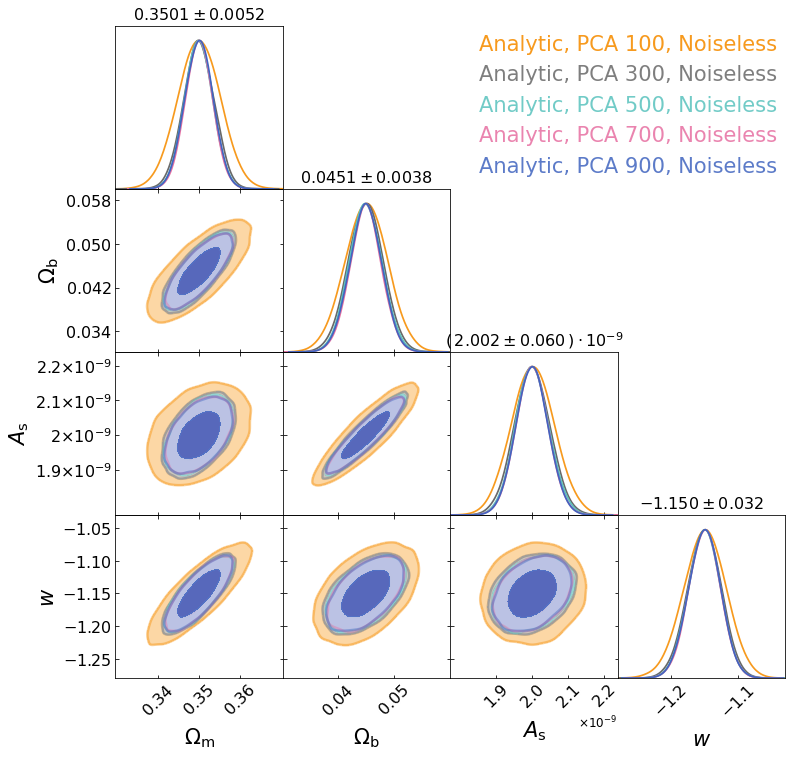

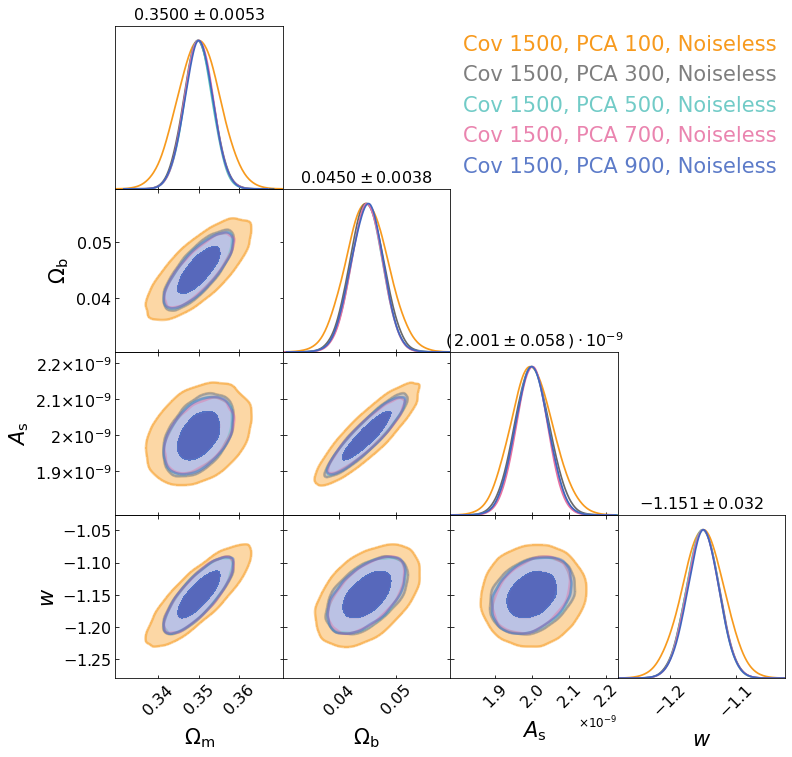

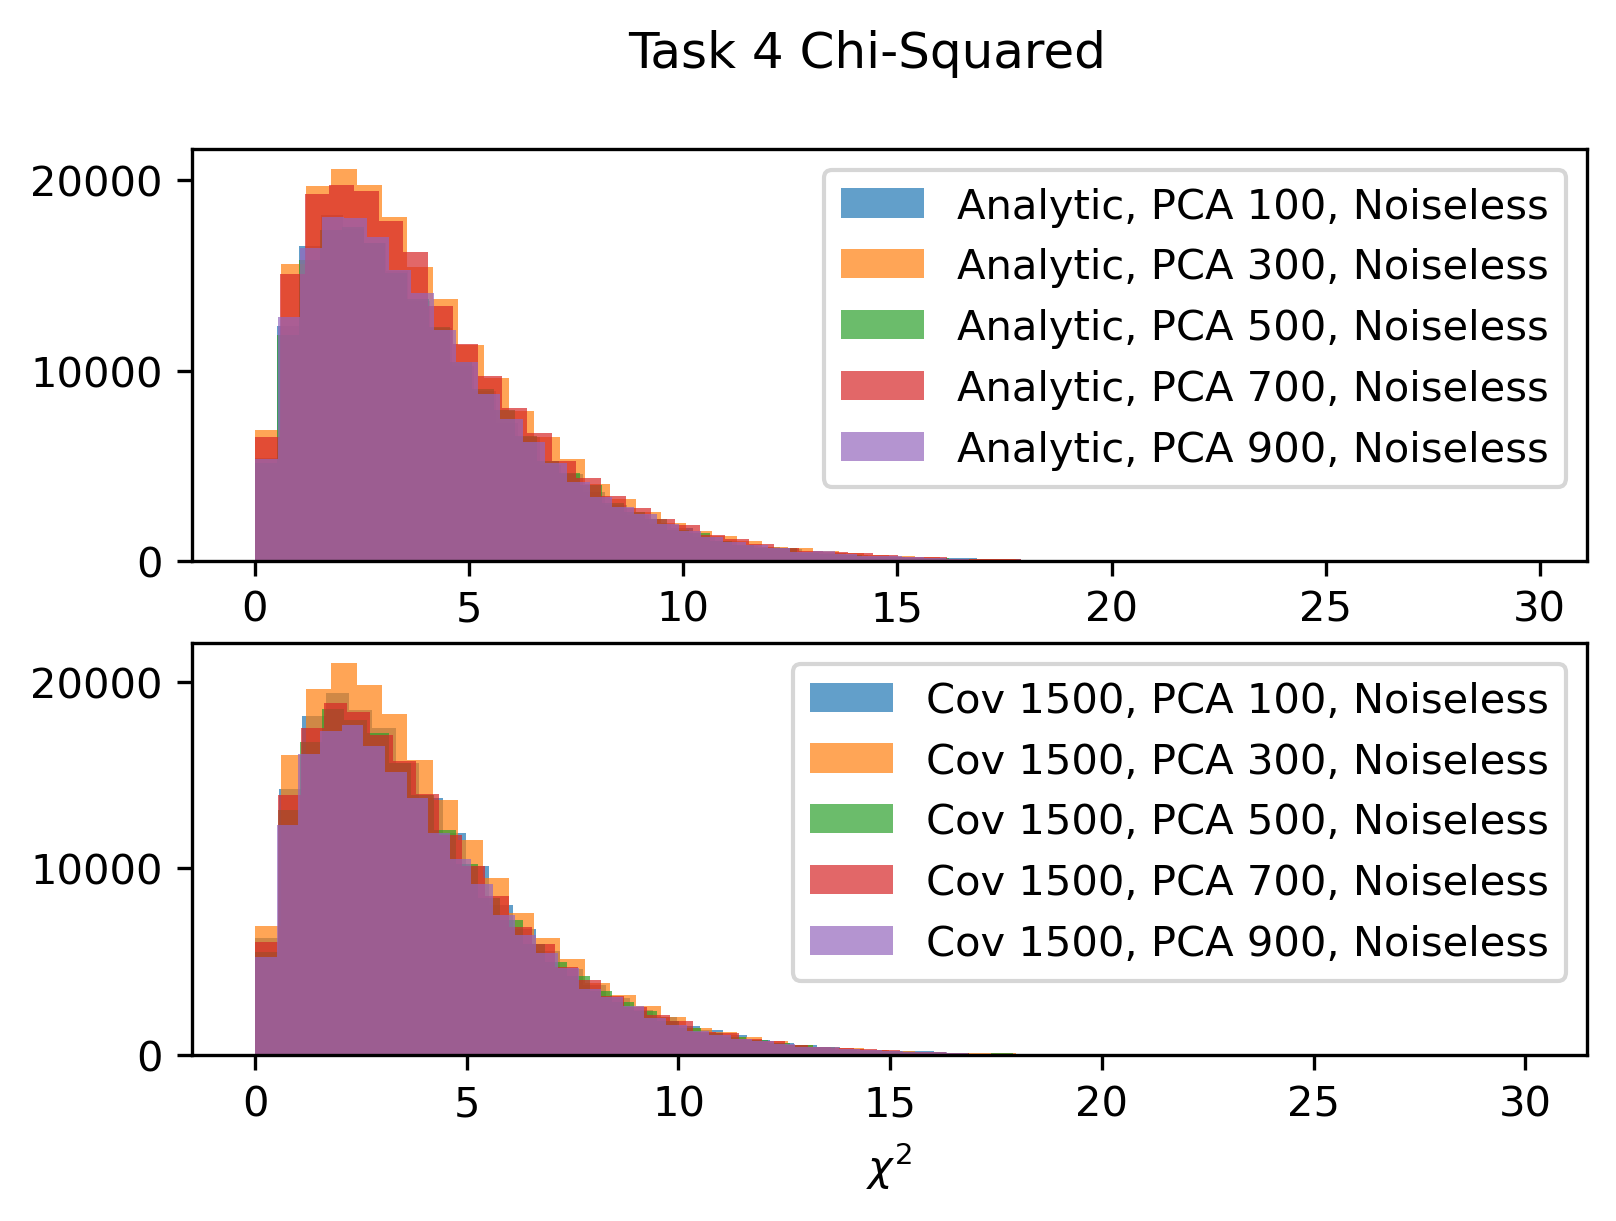

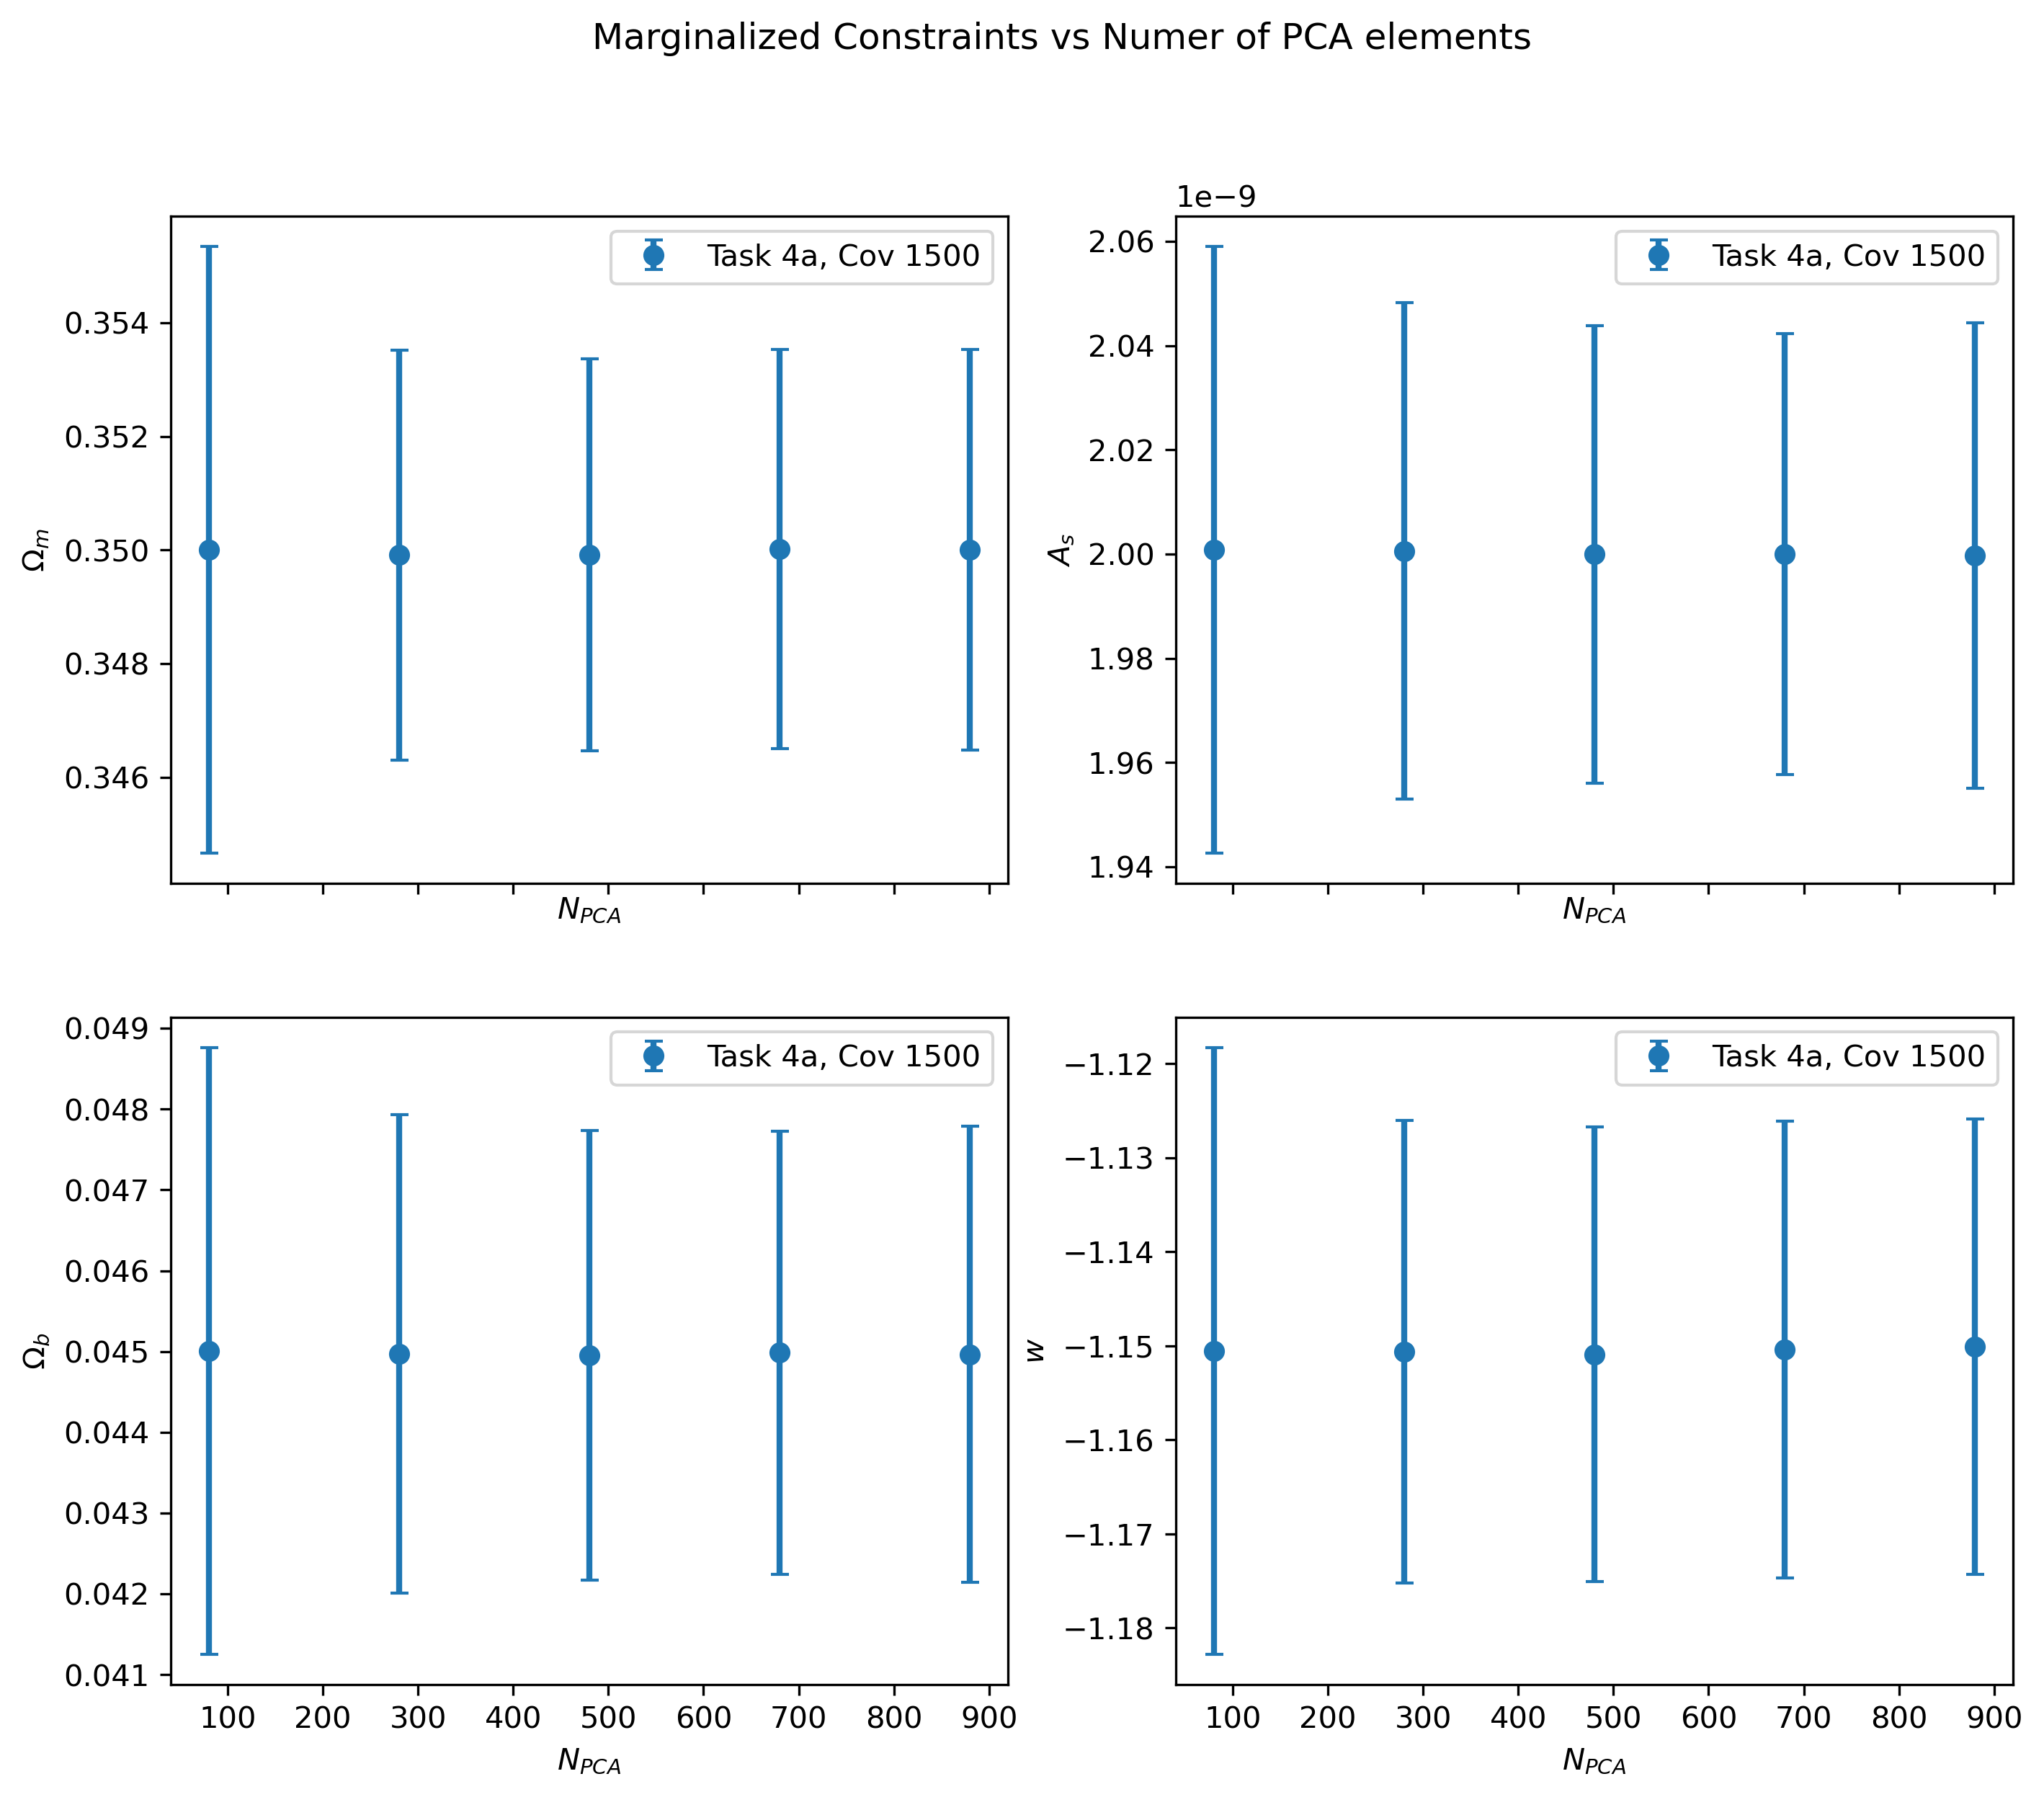

In [6]:
# Reads in the pre-generated data
samples4_analytic_100 = np.load('outputs_MCMC/MCMC_task4a_analytical_100.npy')
samples4_analytic_300 = np.load('outputs_MCMC/MCMC_task4a_analytical_300.npy')
samples4_analytic_500 = np.load('outputs_MCMC/MCMC_task4a_analytical_500.npy')
samples4_analytic_700 = np.load('outputs_MCMC/MCMC_task4a_analytical_700.npy')
samples4_analytic_900 = np.load('outputs_MCMC/MCMC_task4a_analytical_900.npy')
samples4_1500_100 = np.load('outputs_MCMC/MCMC_task4a_1500_100.npy')
samples4_1500_300 = np.load('outputs_MCMC/MCMC_task4a_1500_300.npy')
samples4_1500_500 = np.load('outputs_MCMC/MCMC_task4a_1500_500.npy')
samples4_1500_700 = np.load('outputs_MCMC/MCMC_task4a_1500_700.npy')
samples4_1500_900 = np.load('outputs_MCMC/MCMC_task4a_1500_900.npy')
logp4_analytic_100 = np.load('outputs_MCMC/logp_task4a_analytical_100.npy')
logp4_analytic_300 = np.load('outputs_MCMC/logp_task4a_analytical_300.npy')
logp4_analytic_500 = np.load('outputs_MCMC/logp_task4a_analytical_500.npy')
logp4_analytic_700 = np.load('outputs_MCMC/logp_task4a_analytical_700.npy')
logp4_analytic_900 = np.load('outputs_MCMC/logp_task4a_analytical_900.npy')
logp4_1500_100 = np.load('outputs_MCMC/logp_task4a_1500_100.npy')
logp4_1500_300 = np.load('outputs_MCMC/logp_task4a_1500_300.npy')
logp4_1500_500 = np.load('outputs_MCMC/logp_task4a_1500_500.npy')
logp4_1500_700 = np.load('outputs_MCMC/logp_task4a_1500_700.npy')
logp4_1500_900 = np.load('outputs_MCMC/logp_task4a_1500_900.npy')
samples_getdist4_analytic_100 = MCSamples(samples=samples4_analytic_100,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_analytic_300 = MCSamples(samples=samples4_analytic_300,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_analytic_500 = MCSamples(samples=samples4_analytic_500,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_analytic_700 = MCSamples(samples=samples4_analytic_700,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_analytic_900 = MCSamples(samples=samples4_analytic_900,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_1500_100 = MCSamples(samples=samples4_1500_100,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_1500_300 = MCSamples(samples=samples4_1500_300,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_1500_500 = MCSamples(samples=samples4_1500_500,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_1500_700 = MCSamples(samples=samples4_1500_700,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})
samples_getdist4_1500_900 = MCSamples(samples=samples4_1500_900,
                                          names = param_names_latex, 
                                          ranges = para_priors, 
                                          settings={'smooth_scale_2D': 0.3, 
                                                    'smooth_scale_1D': 0.3})


# Makes a triangle plot of the posteriors for the four parameters
g.triangle_plot(
    roots=[samples_getdist4_analytic_100,
           samples_getdist4_analytic_300,
           samples_getdist4_analytic_500,
           samples_getdist4_analytic_700,
           samples_getdist4_analytic_900],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Analytic, PCA 100, Noiseless',
                     'Analytic, PCA 300, Noiseless',
                     'Analytic, PCA 500, Noiseless',
                     'Analytic, PCA 700, Noiseless',
                     'Analytic, PCA 900, Noiseless'],
    title_limit=1,
    markers=para_names)

g.triangle_plot(
    roots=[samples_getdist4_1500_100,
           samples_getdist4_1500_300,
           samples_getdist4_1500_500,
           samples_getdist4_1500_700,
           samples_getdist4_1500_900],
    filled=True,
    legend_loc='upper right',
    legend_labels = ['Cov 1500, PCA 100, Noiseless',
                     'Cov 1500, PCA 300, Noiseless',
                     'Cov 1500, PCA 500, Noiseless',
                     'Cov 1500, PCA 700, Noiseless',
                     'Cov 1500, PCA 900, Noiseless'],
    title_limit=1,
    markers=para_names)

fig,ax=plt.subplots(2,1, sharex=False, sharey=False, dpi=300)
fig.suptitle('Task 4 Chi-Squared')
ax[0].hist(-2*logp4_analytic_100, label='Analytic, PCA 100, Noiseless', bins=50, alpha=0.7)
ax[0].hist(-2*logp4_analytic_300, label='Analytic, PCA 300, Noiseless', bins=50, alpha=0.7)
ax[0].hist(-2*logp4_analytic_500, label='Analytic, PCA 500, Noiseless', bins=50, alpha=0.7)
ax[0].hist(-2*logp4_analytic_700, label='Analytic, PCA 700, Noiseless', bins=50, alpha=0.7)
ax[0].hist(-2*logp4_analytic_900, label='Analytic, PCA 900, Noiseless', bins=50, alpha=0.7)
ax[1].hist(-2*logp4_1500_100, label='Cov 1500, PCA 100, Noiseless', bins=50, alpha=0.7)
ax[1].hist(-2*logp4_1500_300, label='Cov 1500, PCA 300, Noiseless', bins=50, alpha=0.7)
ax[1].hist(-2*logp4_1500_500, label='Cov 1500, PCA 500, Noiseless', bins=50, alpha=0.7)
ax[1].hist(-2*logp4_1500_700, label='Cov 1500, PCA 700, Noiseless', bins=50, alpha=0.7)
ax[1].hist(-2*logp4_1500_900, label='Cov 1500, PCA 900, Noiseless', bins=50, alpha=0.7)
ax[1].set_xlabel(r'$\chi^2$')
ax[0].legend()
ax[1].legend()

# Makes a plot of the marginalized constraints for different number of PCA elements
Npca_plot = np.array([100, 300, 500, 700, 900])
samples_list_1500 = [samples4_1500_100, samples4_1500_300, samples4_1500_500,
                     samples4_1500_700, samples4_1500_900]
samples_list_analytic = [samples4_analytic_100, samples4_analytic_300, samples4_analytic_500,
                         samples4_analytic_700, samples4_analytic_900]
fig2,ax2=plt.subplots(2, 2, sharex=True, sharey=False, dpi=300, figsize=(11,9))
fig2.suptitle('Marginalized Constraints vs Numer of PCA elements')
ax2[0][0].errorbar(x=Npca_plot-20, y=[np.mean(arr[:,0]) for arr in samples_list_1500],
                   xerr=None, yerr=[np.std(arr[:,0]) for arr in samples_list_1500],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4a, Cov 1500')
ax2[0][0].set_ylabel(r'$\Omega_m$')
ax2[0][0].legend()
ax2[1][0].errorbar(x=Npca_plot-20, y=[np.mean(arr[:,1]) for arr in samples_list_1500],
                   xerr=None, yerr=[np.std(arr[:,1]) for arr in samples_list_1500],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4a, Cov 1500')
ax2[1][0].set_ylabel(r'$\Omega_b$')
ax2[1][0].legend()
ax2[0][1].errorbar(x=Npca_plot-20, y=[np.mean(arr[:,2]) for arr in samples_list_1500],
                   xerr=None, yerr=[np.std(arr[:,2]) for arr in samples_list_1500],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4a, Cov 1500')
ax2[0][1].set_ylabel(r'$A_s$')
ax2[0][1].legend()
ax2[1][1].errorbar(x=Npca_plot-20, y=[np.mean(arr[:,3]) for arr in samples_list_1500],
                   xerr=None, yerr=[np.std(arr[:,3]) for arr in samples_list_1500],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4a, Cov 1500')
ax2[1][1].set_ylabel(r'$w$')
ax2[1][1].legend()
ax2[0][0].set_xlabel(r'$N_{PCA}$')
ax2[0][1].set_xlabel(r'$N_{PCA}$')
ax2[1][0].set_xlabel(r'$N_{PCA}$')
ax2[1][1].set_xlabel(r'$N_{PCA}$')

## TASK 4b

To check whether our answer in 4a is reliable, we run multiple MCMC chains (with different initial seeds) for the 1500 covariance scenario to see how the constraints change. We fix our number of PCA elements at 300 and use the same covariance matrix. We notice that the constraint estimates between the different trial runs are all very similar and their errorbars are extremely close in size. At the very least, the size of variation in the errorbars is much smaller than the size of the errorbars themselves, and therefore we can be confident that our answers in 4a are indeed reliable. If we had alternatively found that the uncertainties changed significantly between trial runs, we wouldn't be able to be confident that our uncertainties were actually decreasing with the number of PCA elements, as it could have just been chance fluctuation, but we have explicitly confirmed this is not the case! If we wanted to make our answer to part a even more reliable, we could simply run multiple independent chains and average over the resulting best fits and variances to beat down any noise associated with running just a single chain.

Text(0.5, 0, 'Trial run')

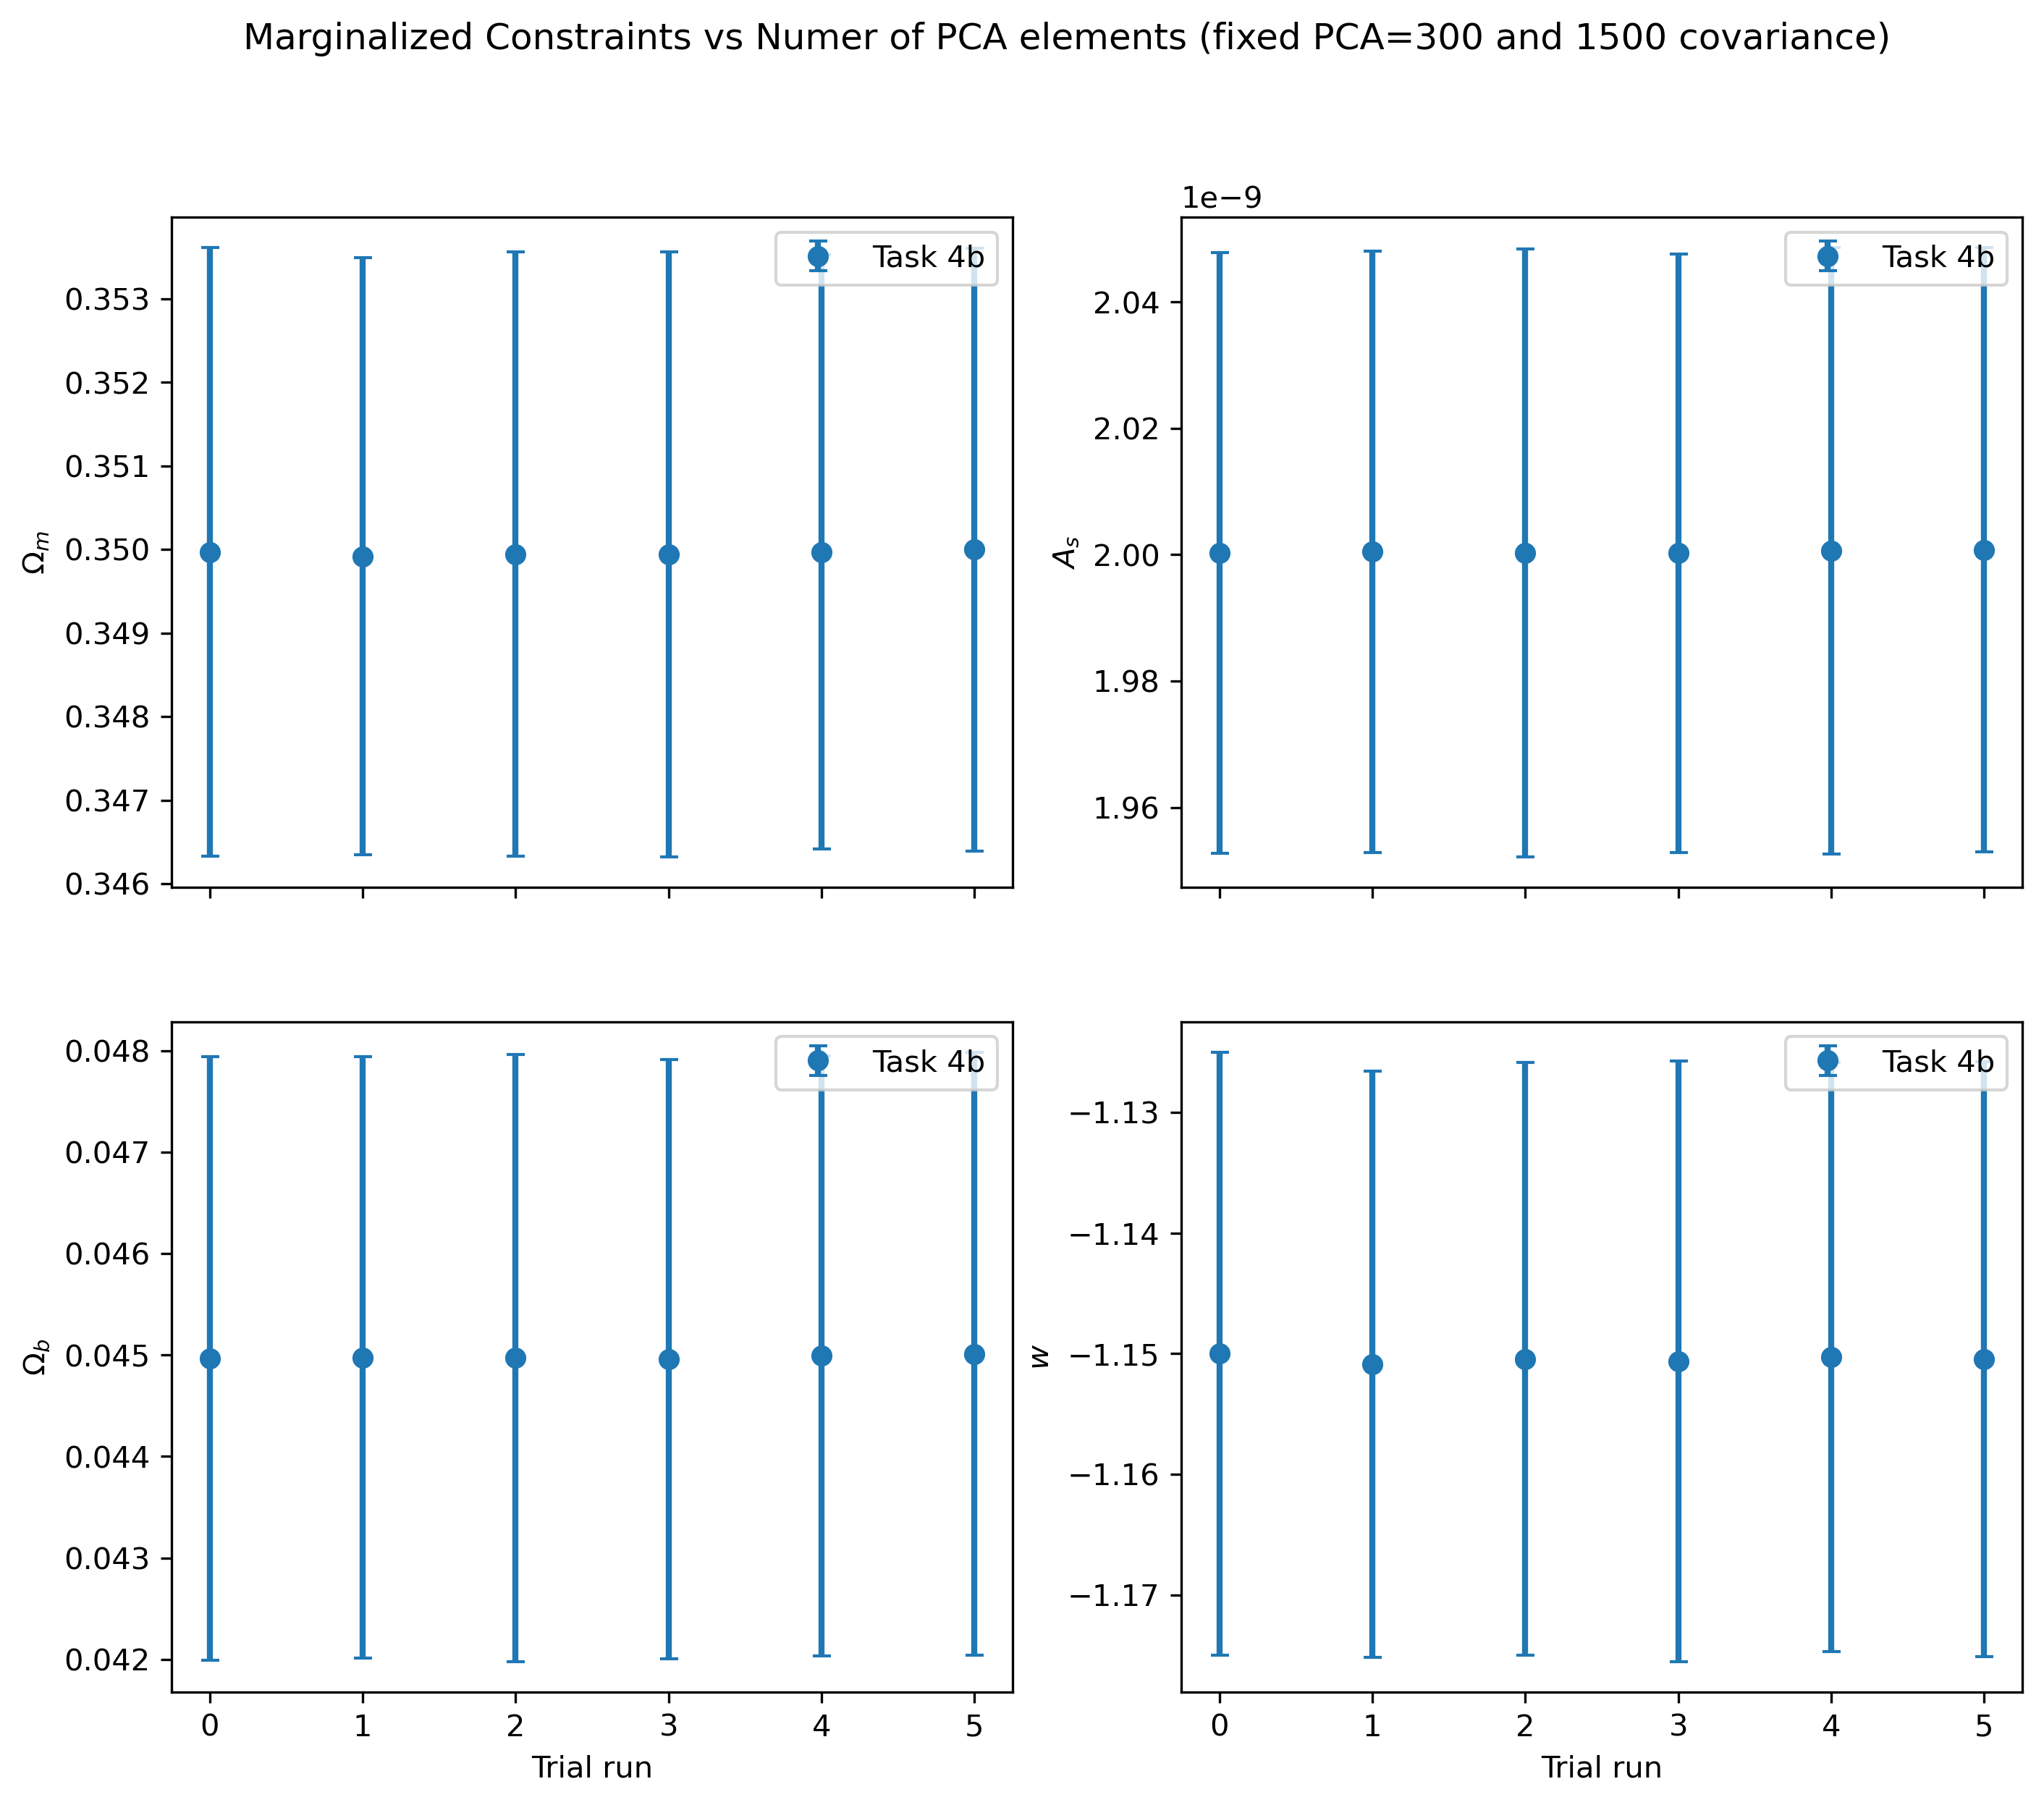

In [7]:
# Reads in the pre-generated data
samples4b_1500_300_0 = np.load('outputs_MCMC/MCMC_task4b_1500_300_0.npy')
samples4b_1500_300_1 = np.load('outputs_MCMC/MCMC_task4b_1500_300_1.npy')
samples4b_1500_300_2 = np.load('outputs_MCMC/MCMC_task4b_1500_300_2.npy')
samples4b_1500_300_3 = np.load('outputs_MCMC/MCMC_task4b_1500_300_3.npy')
samples4b_1500_300_4 = np.load('outputs_MCMC/MCMC_task4b_1500_300_4.npy')
samples4b_1500_300_5 = np.load('outputs_MCMC/MCMC_task4b_1500_300_5.npy')

# Makes a constrain plots for the different MCMC chain runs for the different parameters
samples_list = [samples4b_1500_300_0, samples4b_1500_300_1, samples4b_1500_300_2,
                samples4b_1500_300_3, samples4b_1500_300_4, samples4b_1500_300_5]
fig,ax=plt.subplots(2, 2, sharex=True, sharey=False, dpi=300, figsize=(11,9))
fig.suptitle('Marginalized Constraints vs Numer of PCA elements (fixed PCA=300 and 1500 covariance)')
ax[0][0].errorbar(x=[0,1,2,3,4,5], y=[np.mean(arr[:,0]) for arr in samples_list],
                  xerr=None, yerr=[np.std(arr[:,0]) for arr in samples_list],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4b')
ax[1][0].errorbar(x=[0,1,2,3,4,5], y=[np.mean(arr[:,1]) for arr in samples_list],
                  xerr=None, yerr=[np.std(arr[:,1]) for arr in samples_list],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4b')
ax[0][1].errorbar(x=[0,1,2,3,4,5], y=[np.mean(arr[:,2]) for arr in samples_list],
                  xerr=None, yerr=[np.std(arr[:,2]) for arr in samples_list],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4b')
ax[1][1].errorbar(x=[0,1,2,3,4,5], y=[np.mean(arr[:,3]) for arr in samples_list],
                  xerr=None, yerr=[np.std(arr[:,3]) for arr in samples_list],
                  linestyle='', fmt='o', capsize=3, capthick=1, linewidth=2, label='Task 4b')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[0][0].set_ylabel(r'$\Omega_m$')
ax[1][0].set_ylabel(r'$\Omega_b$')
ax[0][1].set_ylabel(r'$A_s$')
ax[1][1].set_ylabel(r'$w$')
ax[1][0].set_xlabel('Trial run')
ax[1][1].set_xlabel('Trial run')